In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

%matplotlib inline


# generate regression dataset
#X, y = make_regression(n_samples=100, n_features=4, noise=5)
# plot regression dataset
#pyplot.scatter(X,y)
#pyplot.show()

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 4, n_informative = 4, n_targets = 1, 
                                              noise = 6, coef = True, random_state = 5)

In [3]:
coef

array([23.1850338 , 25.26900218, 53.95649415, 10.61078769])

In [4]:
data.shape

(1000, 4)

In [25]:
# Отмасштабируем получившиеся признаки методом стандартизации.

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [26]:
# шаг градиентного спуска
eta = 0.1

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 0.001


In [27]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Градиентный спуск

In [28]:
# максимальное число итераций
max_iter_1 = 1e2

# возьмем нулевые начальные веса
w_1 = np.zeros(data.shape[1])

# зададим начальную разницу весов большим числом
weight_dist_1 = np.inf

# список векторов весов после каждой итерации
w_list_1 = [w_1.copy()]

# список значений ошибок после каждой итерации
errors_1 = []

# счетчик итераций
iter_num_1 = 0

# ход градиентного спуска
while weight_dist_1 > min_weight_dist or iter_num_1 < max_iter_1:
    new_w_1 = w_1 - 2 * eta * np.dot(data.T, (np.dot(data, w_1) - target)) / target.shape[0]
    weight_dist_1 = np.linalg.norm(new_w_1 - w_1, ord=2)
    
    w_list_1.append(new_w_1.copy())
    errors_1.append(mserror(data, new_w_1, target))
    
    iter_num_1 += 1
    w_1 = new_w_1
    
w_list_1 = np.array(w_list_1)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_1[-1], 4)}, количество итераций {iter_num_1}')

В случае использования градиентного спуска функционал ошибки составляет 38.4867, количество итераций 100


Стохастический градиентный спуск

In [29]:
# максимальное число итераций
max_iter_2 = 1e5

# возьмем нулевые начальные веса
w_2 = np.zeros(data.shape[1])

# зададим начальную разницу весов большим числом
weight_dist_2 = np.inf

# список векторов весов после каждой итерации
w_list_2 = [w_2.copy()]

# список значений ошибок после каждой итерации
errors_2 = []

# счетчик итераций
iter_num_2 = 0

#np.random.seed(1234)

# ход градиентного спуска
while weight_dist_2 > min_weight_dist or iter_num_2 < max_iter_2:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w_2 = w_2 - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w_2) - target[train_ind])) / target.shape[0]

    weight_dist_2 = np.linalg.norm(new_w_2 - w_2, ord=2)
    
    w_list_2.append(new_w_2.copy())
    errors_2.append(mserror(data, new_w_2, target))
    
    iter_num_2 += 1
    w_2 = new_w_2
    
w_list_2 = np.array(w_list_2)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_2[-1], 4)}, количество итераций {iter_num_2}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 38.4877, количество итераций 100003


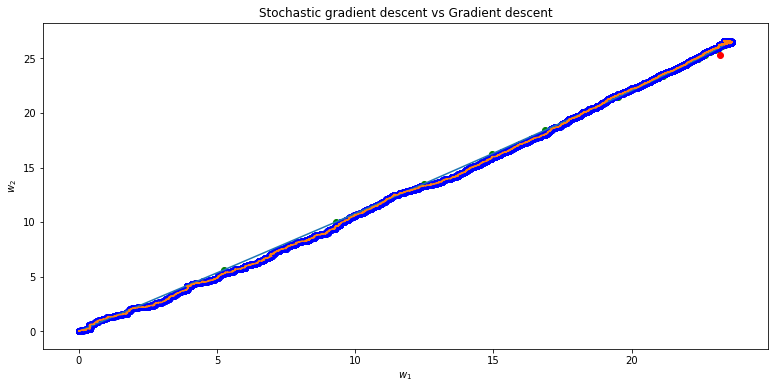

In [30]:
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent vs Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_1[:, 0], w_list_1[:, 1], c='g')
plt.scatter(w_list_2[:, 0], w_list_2[:, 1], c='b')
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list_1[:, 0], w_list_1[:, 1])
plt.plot(w_list_2[:, 0], w_list_2[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

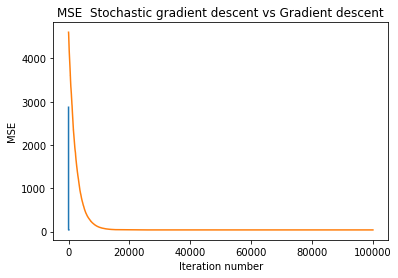

In [31]:
plt.plot(range(len(errors_1)), errors_1)
plt.plot(range(len(errors_2)), errors_2)
plt.title('MSE  Stochastic gradient descent vs Gradient descent')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Вывод: для данной модели скорость сходимости стохастического градиентного спуска по сравнению с градиентным спуском значительно ниже.

Модифицировать решение первого задания путем добавления  𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [12]:
ridge = Ridge(alpha=0.1)
ridge.fit(data, target)
print(ridge.coef_)

[23.51370817 26.48572239 54.22617994 10.47280149]


In [13]:
lasso = Lasso(alpha=0.1)
lasso.fit(data, target)
print(lasso.coef_)

[23.41491158 26.38738507 54.14509669 10.36896877]


In [ ]:
def mserror(X, w, y_pred):
    L2w = w + np.linalg.norm(w)
    y = X.dot(L2w)
    return (sum((y - y_pred)**2)) / len(y)